## Implement Linear Regression (Gradient Descent) with 1 variable


Using Gradient-descent minimize Loss function of LR

L = (1/n) * Sum((y_pred - y)**2)

beta = [a, b]
y_pred = a + b * x

1) Choose random betas

2) Calculate the derivative of the loss function for the first betas

3) Choose second set of betas by moving in the opposite direction of derivative

4) Calculate the derivative of the loss function for the netx set of betas

5) If the derivative is equal (or close) to zero - STOP

   In other cases continue choosing new betas and checking the derivative of the Loss f.



In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
#y = 3 + 2x

In [3]:
a0 = 3
b0 = 2

In [4]:
x = np.linspace(-5,10,1000)
y = a0 + b0*x + np.random.normal(0,2,1000)

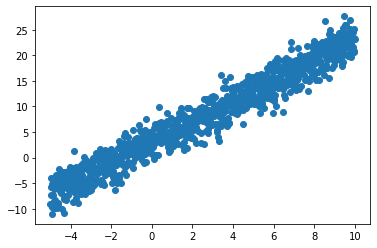

In [5]:
plt.scatter(x,y)
plt.show()

In [6]:
a = 4
b = 3

y_pred = a + b*x 

n = len(x)

L = (1/n) * np.sum((y_pred - y)**2)

c = 0.02

max_iter = 1000
metric_change = 0.00000000000000000001

for i in range(max_iter):
    pDa = (1/n) * np.sum(2 * (a + b * x - y ) * 1)
    pDb = (1/n) * np.sum(2 * (a + b * x - y ) * x)
    
    a = a - c * pDa
    b = b - c * pDb
    
    L_change = L - (1/n) * np.sum((a + b * x - y)**2)
    L = (1/n) * np.sum((a + b * x - y)**2)
    
    if(L_change <= metric_change):
        print(i)
        break

print(a,b)

519
2.9832917459048716 1.9897735709442408


LinearRegression class implementation for 1 variable

In [7]:
class LinearRegression:
    def __init__(self, w0,w1,max_iteration,lr=0.001, metric_change = 0.0000000001):
        self.lr = lr
        self.w0 = w0
        self.w1 = w1
        self.max_iteration = max_iteration
        self.metric_change = metric_change
    
    def cost_function(self,x,y):
        n = len(x)
       
        
        pDw0 = (2/n) * np.sum((self.w0 + self.w1*x) - y)
        pDw1 = (2/n) * np.sum((self.w0 + self.w1*x - y) * x)
        
        return pDw0, pDw1
        
        
    def update_weights(self, x,y):
        
        pDw0, pDw1 = self.cost_function(x,y)
        
        self.w0 = self.w0 - self.lr * pDw0
        self.w1 = self.w1 -self.lr * pDw1
        
        #print(self.w0,self.w1)
              
    
    def fit(self, x_train, y_train):
        for i in range(self.max_iteration):
            
            L =  np.mean((self.w0 + self.w1*x_train - y_train)**2)
            
            self.update_weights(x_train,y_train)
            
            L_change = L -  np.mean((self.w0 + self.w1*x_train - y_train)**2)
            
            if (L_change <= self.metric_change):
   
                 break   
                 
    def predict(self, x_test):
        
        y_pred = self.w0 + self.w1*x_test
        return y_pred

use case of LinearRegression class

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state = 37 )

In [9]:
model = LinearRegression(w0 = 2,w1 = 1,max_iteration = 2000)
model.fit(x_train,y_train)

In [10]:
y_pred = model.predict(x_test)

In [11]:
mean_squared_error(y_test,y_pred)

4.765653668514323

In [12]:
r2_score(y_test, y_pred)

0.9450865105582563

## Implement Linear Regression (Gradient Descent) for unlimited number of variables

In [13]:
class LinearRegression_:
    def __init__(self,lr = 0.01, max_iter = 1000,tol = 0.001):
        self.lr = lr
        self.w = np.array([])
        self.max_iter = max_iter
        self.tol = tol
    def cost_function(self,X,y):
        X = np.array(X)
        y = np.array(y)
        
        if(X.ndim == 1):
            X = X.reshape(-1,1)
            
        n = X.shape[0]
        X = np.concatenate((np.ones((n,1)),X),axis = 1)
        
        return (X @ self.w - y).T @ (X @ self.w - y) / n
    
    def update_weights(self,X,y):
        n = X.shape[0]
        grad = (1/n) * X.T @ (X @ self.w - y)
        self.w -= self.lr * grad
    
    def fit(self,x_train,y_train):
        x_train = np.array(x_train)
        y_train = np.array(y_train)
        
        n = x_train.shape[0]
        X = np.concatenate((np.ones((n,1)),x_train),axis = 1)
        self.w = np.zeros(X.shape[1]) 
        
        for _ in range(self.max_iter):
            cost_prev = self.cost_function(x_train,y_train)
            self.update_weights(X,y_train)
            
            if abs(cost_prev - self.cost_function(x_train,y_train) <= self.tol):
                break
    def predict(self,x_test):
        x_test = np.array(x_test)
        if x_test.ndim == 1 :
            x_test = x_test.reshape(-1,1)
        
        x_test = np.concatenate((np.ones((x_test.shape[0],1)),x_test),axis = 1)
        y_pred = x_test @ self.w
        return y_pred
    
    

In [14]:
df = pd.read_csv('C:/Users/anush/Downloads/Ecommerce.csv')
df = df._get_numeric_data()
df.head()

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [15]:
xTrain, xTest, yTrain, yTest = train_test_split(df[df.columns.difference(['Yearly Amount Spent'])],df['Yearly Amount Spent'], test_size=0.2, random_state=10)

In [16]:
lr = LinearRegression_(lr = 0.00061, max_iter = 10000)
lr.fit(xTrain,yTrain)
yPred = lr.predict(xTest)
lr.cost_function(xTest, yTest)

443.49757215937245

In [17]:
r2_score(yPred, yTest)

0.9246500615610129